A quick look into Canny Edge Detection

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

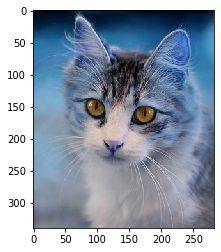

In [2]:
img = cv2.imread('cat.jpg')
plt.imshow(img)
#cv2.imshow('image',img)

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

In [4]:
def f(x, y, z, a, t):
    edges = cv2.Canny(img,x,y,z, a, L2gradient=t) #100, 400, 500, 3, True
    plt.subplot(122)
    plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

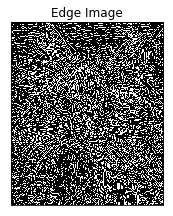

In [5]:
interact(f, x=widgets.IntSlider(min=0, max=1000, step=20, value=10),
        y=widgets.IntSlider(min=0, max=1000, step=20, value=10),
        z=widgets.IntSlider(min=0, max=1000, step=20, value=10),
        a=widgets.IntSlider(min=3, max=7, step=2, value=3),
        t=widgets.Checkbox(value=False,description='Check me',disabled=False));

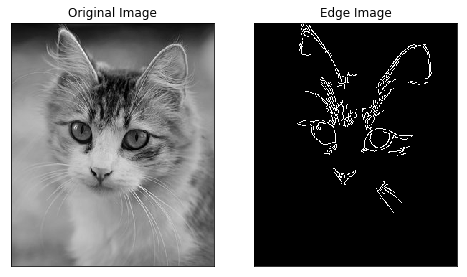

In [6]:
img = cv2.imread('cat.jpg',0)
edges = cv2.Canny(img,100,400,500, 3, L2gradient=True)
figure(figsize=(8,6))



plt.subplot(121)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5,1,'Original Image'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

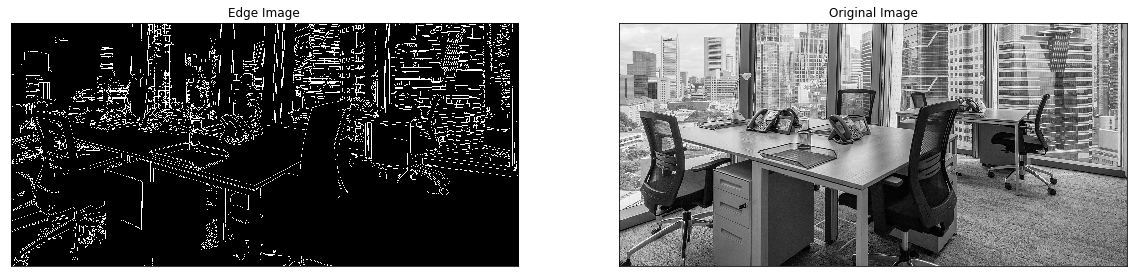

In [7]:
img = cv2.imread('test.jpg',0)
edges = cv2.Canny(img,100,600,500, 3, L2gradient=True)
figure(figsize=(20,6))





plt.subplot(121)
plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

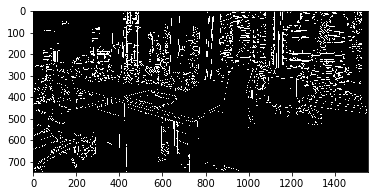

In [8]:
image = cv2.imread('test.jpg') 
height, width, channels = image.shape
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

edged = cv2.Canny(gray, 100,600,500, 3, L2gradient=True) 
plt.imshow( edged ,cmap = 'gray') 



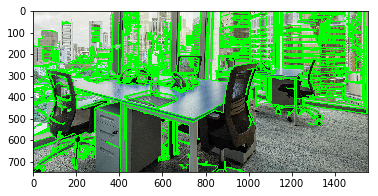

In [9]:


contours, hierarchy = cv2.findContours(edged,  
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 

plt.imshow( edged) 

cv2.drawContours(image, contours, -1, (0, 255, 0), 3) 
  
plt.imshow( image) 
cv2.destroyAllWindows() 

In [10]:
c = max(contours, key=cv2.contourArea) #max contour
f = open('path.svg', 'w+')
f.write('<svg width="'+str(width)+'" height="'+str(height)+'" xmlns="http://www.w3.org/2000/svg">')
f.write('<path d="M')

for i in range(len(c)):
    #print(c[i][0])
    x, y = c[i][0]
    f.write(str(x)+  ' ' + str(y)+' ')

f.write('"/>')
f.write('</svg>')
f.close()

In [6]:

from skimage import measure
from skimage import io, filters
from skimage.color import rgb2gray

# SciKit Learn contour

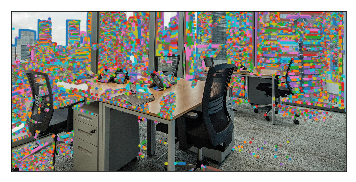

In [14]:
# Construct some test data
imagesci = io.imread("test.jpg")
imagesci_gray = rgb2gray(imagesci)
#display(imagesci_gray.shape)
#io.imshow(imagesci_gray)

# Find contours at a constant value of 0.8
contours = measure.find_contours(imagesci_gray, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(imagesci, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

In [ ]:
#### Potrace

In [26]:
import numpy as np
import potrace

# Make a numpy array with a rectangle in the middle
data = np.zeros((32, 32), np.uint32)
data[8:32-8, 8:32-8] = 1

# Create a bitmap from the array
bmp = potrace.Bitmap(data)

# Trace the bitmap to a path
path = bmp.trace()

# Iterate over path curves
for curve in path:
    print("start_point =", curve.start_point)
    for segment in curve:
        print(segment)
        end_point_x, end_point_y = segment.end_point
        if segment.is_corner:
            c_x, c_y = segment.c
        else:
            c1_x, c1_y = segment.c1
            c2_x, c2_y = segment.c2

start_point = (8.0, 16.0)
CornerSegment(c=(8.0, 8.0), end_point=(16.0, 8.0))
CornerSegment(c=(24.0, 8.0), end_point=(24.0, 16.0))
CornerSegment(c=(24.0, 24.0), end_point=(16.0, 24.0))
CornerSegment(c=(8.0, 24.0), end_point=(8.0, 16.0))


In [29]:
imagesci = io.imread("test.jpg")
imagesci_gray = rgb2gray(imagesci)

#io.imshow(imagesci_gray)

data2 = Bitmap(imagesci_gray)

path2 = data2.trace()
for curve in path2:
    print("start_point =", curve.start_point)
    for segment in curve:
        print(segment)
        end_point_x, end_point_y = segment.end_point
        if segment.is_corner:
            c_x, c_y = segment.c
        else:
            c1_x, c1_y = segment.c1
            c2_x, c2_y = segment.c2